Chapter 3

Staring with the obvious, classifier -> categorical values and regression -> numerical values.
Classifier-> finds k clsoest training samples or takes the majority vote of neighbors' class labels.
Regression-> Finds k closest training samples but takes the mean of the neighbors' target values.

In [51]:
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.stats.anova as anova
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

In [2]:
auto = pd.read_csv('Auto.csv')

array([[<Axes: xlabel='mpg', ylabel='mpg'>,
        <Axes: xlabel='cylinders', ylabel='mpg'>,
        <Axes: xlabel='displacement', ylabel='mpg'>,
        <Axes: xlabel='weight', ylabel='mpg'>,
        <Axes: xlabel='acceleration', ylabel='mpg'>,
        <Axes: xlabel='year', ylabel='mpg'>,
        <Axes: xlabel='origin', ylabel='mpg'>],
       [<Axes: xlabel='mpg', ylabel='cylinders'>,
        <Axes: xlabel='cylinders', ylabel='cylinders'>,
        <Axes: xlabel='displacement', ylabel='cylinders'>,
        <Axes: xlabel='weight', ylabel='cylinders'>,
        <Axes: xlabel='acceleration', ylabel='cylinders'>,
        <Axes: xlabel='year', ylabel='cylinders'>,
        <Axes: xlabel='origin', ylabel='cylinders'>],
       [<Axes: xlabel='mpg', ylabel='displacement'>,
        <Axes: xlabel='cylinders', ylabel='displacement'>,
        <Axes: xlabel='displacement', ylabel='displacement'>,
        <Axes: xlabel='weight', ylabel='displacement'>,
        <Axes: xlabel='acceleration', ylabel='di

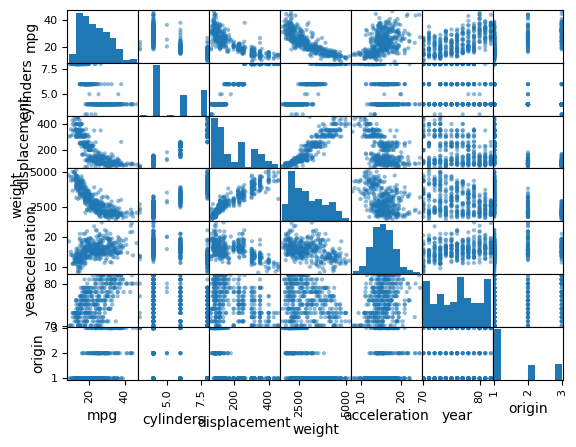

In [3]:
pd.plotting.scatter_matrix(auto)

In [4]:
auto.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name'],
      dtype='object')

In [5]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [6]:
auto.dtypes

,0
mpg,float64
cylinders,int64
displacement,float64
horsepower,object
weight,int64
acceleration,float64
year,int64
origin,int64
name,object


In [7]:
auto.describe()

,mpg,cylinders,displacement,weight,acceleration,year,origin
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,23.515869,5.458438,193.532746,2970.261965,15.555668,75.994962,1.574307
std,7.825804,1.701577,104.379583,847.904119,2.749995,3.690005,0.802549
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,2223.000000,13.800000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3609.000000,17.100000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [8]:
auto.corr(numeric_only=True)

,mpg,cylinders,displacement,weight,acceleration,year,origin
mpg,1.000000,-0.776260,-0.804443,-0.831739,0.422297,0.581469,0.563698
cylinders,-0.776260,1.000000,0.950920,0.897017,-0.504061,-0.346717,-0.564972
displacement,-0.804443,0.950920,1.000000,0.933104,-0.544162,-0.369804,-0.610664
weight,-0.831739,0.897017,0.933104,1.000000,-0.419502,-0.307900,-0.581265
acceleration,0.422297,-0.504061,-0.544162,-0.419502,1.000000,0.282901,0.210084
year,0.581469,-0.346717,-0.369804,-0.307900,0.282901,1.000000,0.184314
origin,0.563698,-0.564972,-0.610664,-0.581265,0.210084,0.184314,1.000000


In [9]:
x = auto[['mpg','cylinders','displacement','weight','horsepower','acceleration','origin','year']].dropna()
y = auto[['mpg']]

In [10]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [13]:
model = smf.ols('mpg ~ cylinders + displacement + weight + acceleration + origin + year',data=x).fit()

In [14]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     298.9
Date:                Sun, 22 Jun 2025   Prob (F-statistic):          1.72e-142
Time:                        14:36:38   Log-Likelihood:                -1037.7
No. Observations:                 397   AIC:                             2089.
Df Residuals:                     390   BIC:                             2117.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -20.1358      4.145     -4.858      0.000     -28.286     -11.986
cylinders       -0.4198      0.320     -1.311      0.191      -1.049       0.210
displacement     0.0174      0.007      2.423      0.016       0.003       0.032
weight          -0.0069      0.001    -11.983      0.000      -0.008      -0.006
acceleration     0.1591      0.077      2.055      0.041       0.007       0.311
origin           1.3560      0.269      5.040      0.000       0.827       1.885
year             0.7703      0.049     15.613      0.000       0.673       0.867
==============================================================================
Omnibus:                       29.082   Durbin-Watson:                   1.289
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.906
Skew:                           0.494   Prob(JB):                     6.52e-11
Kurtosis:                       4.363   Cond. No.                     7.68e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.68e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
anova_results = anova.anova_lm(model)
print(anova_results)

                 df        sum_sq       mean_sq            F         PR(>F)
cylinders       1.0  14613.945015  14613.945015  1315.796871  4.942459e-127
displacement    1.0   1112.755282   1112.755282   100.189231   3.831366e-21
weight          1.0   1208.388167   1208.388167   108.799737   1.244171e-22
acceleration    1.0     61.173297     61.173297     5.507865   1.943067e-02
origin          1.0    217.001439    217.001439    19.538175   1.279939e-05
year            1.0   2707.497878   2707.497878   243.775191   4.921245e-43
Residual      390.0   4331.548949     11.106536          NaN            NaN


Yes, there is a relationship between the predictors and the results are highly significant (small p values and significant sum_sq results, except for acceleration).

Year has a significant positive relationship with mpg, due to the positive-valued coefficient = 0.7703.

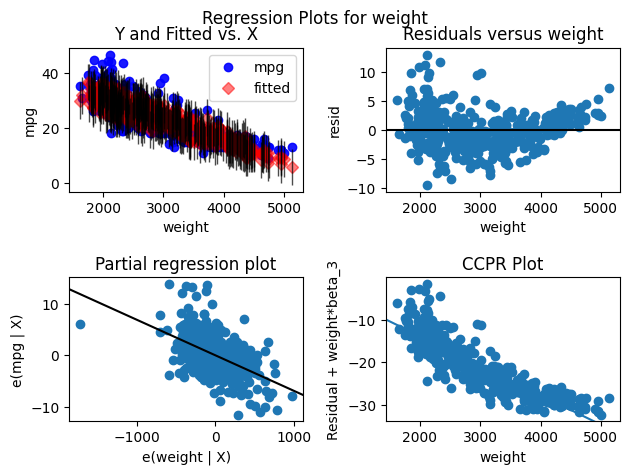

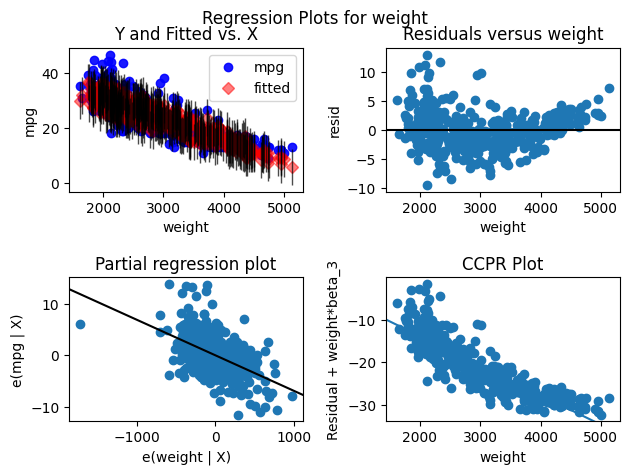

In [28]:
sm.graphics.plot_regress_exog(model, 'weight')

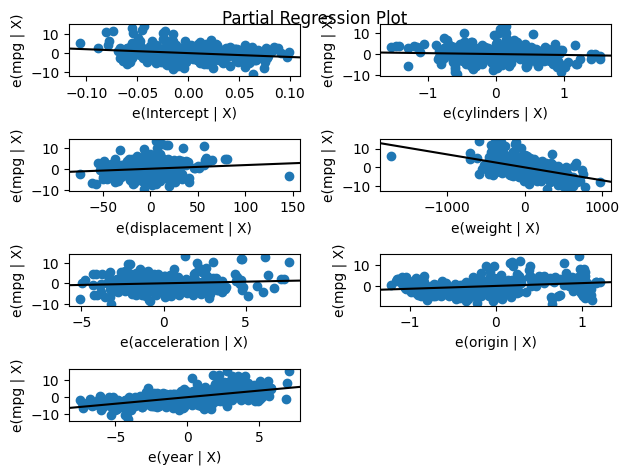

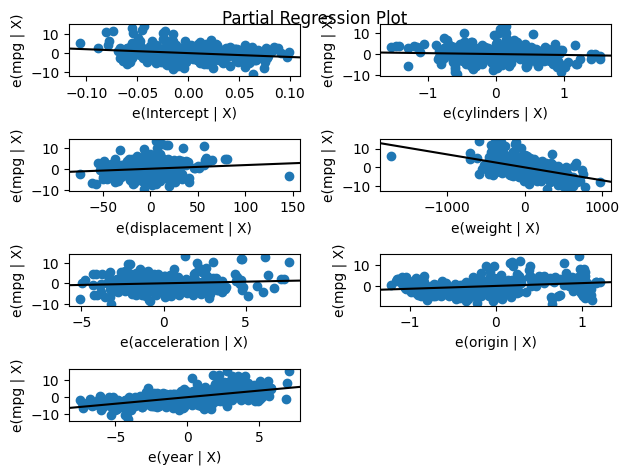

In [29]:
sm.graphics.plot_partregress_grid(model)

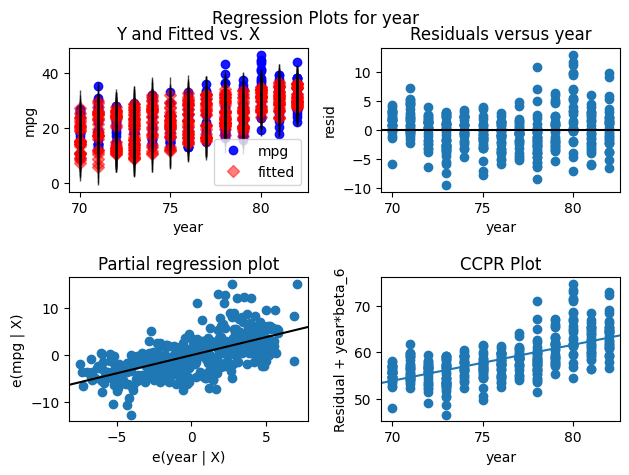

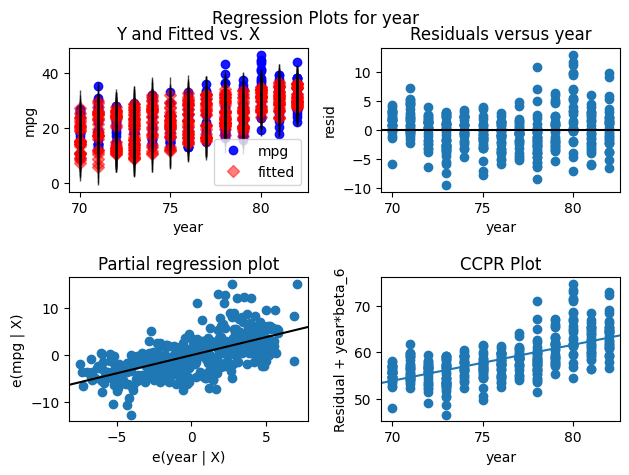

In [30]:
sm.graphics.plot_regress_exog(model, 'year')

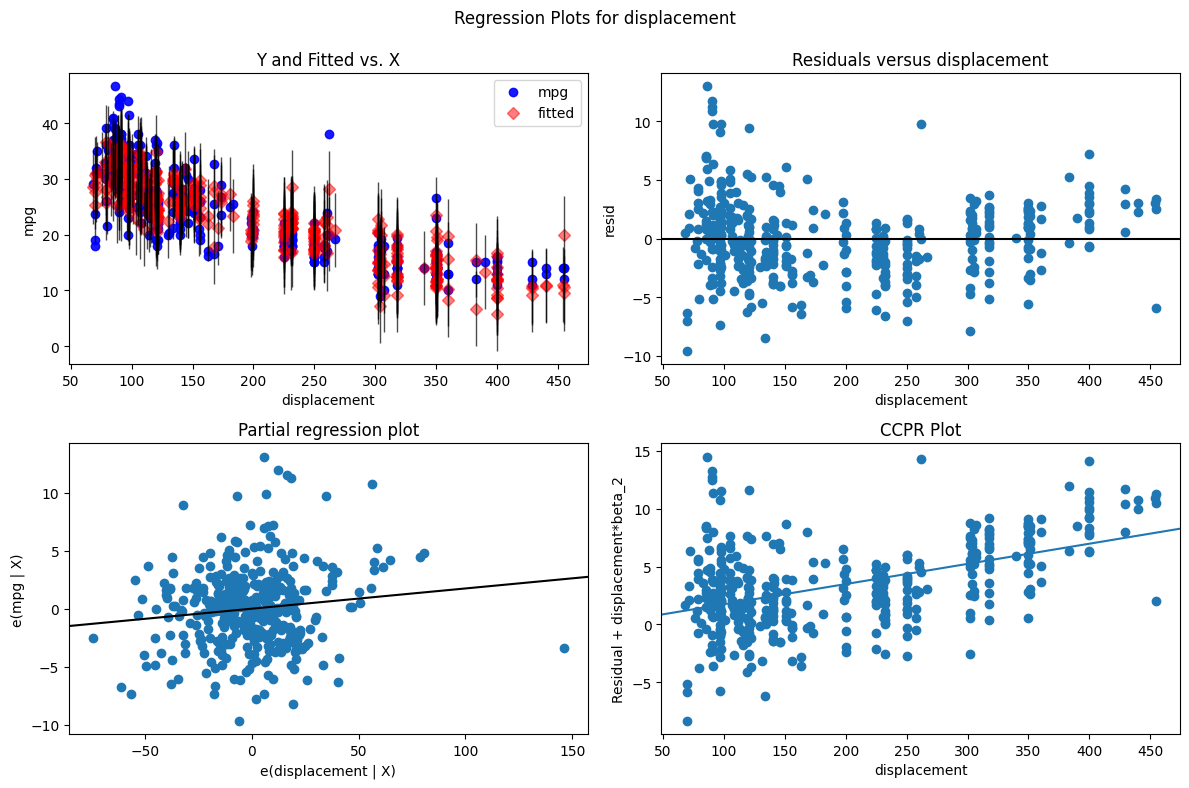

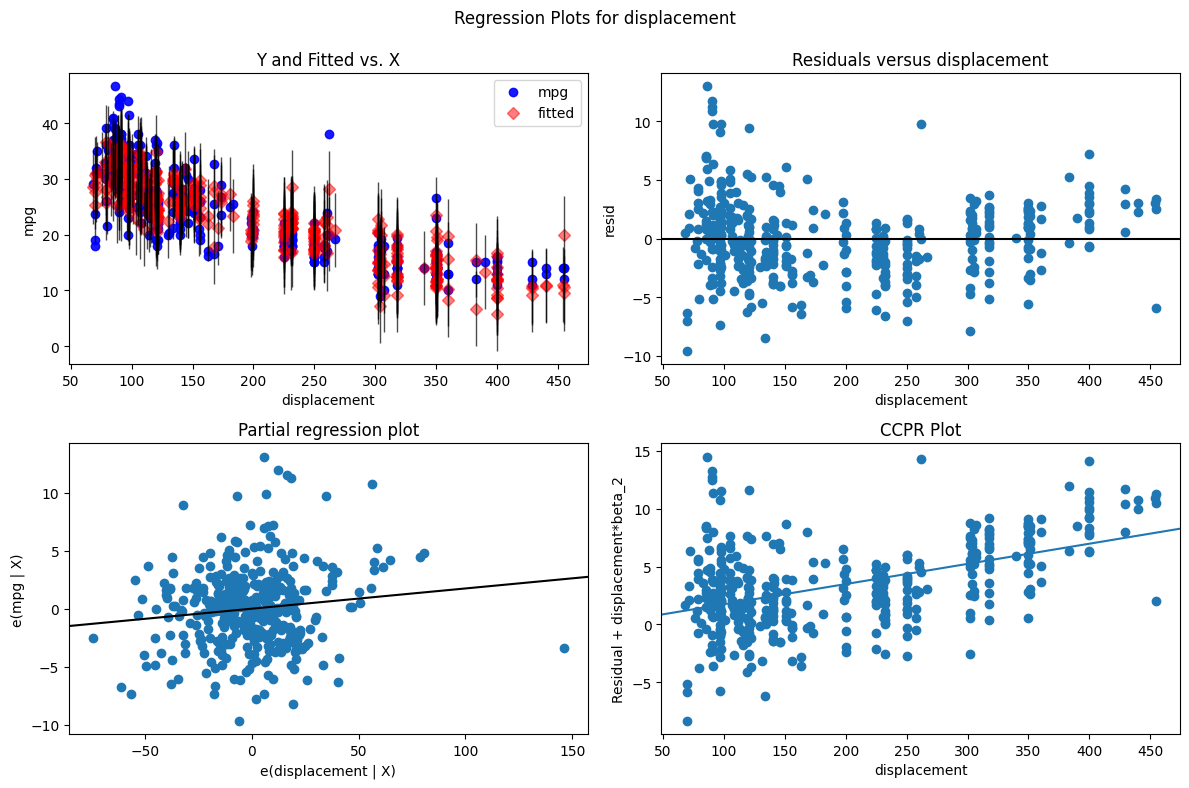

In [49]:
fig = plt.figure(figsize=(12, 8))
sm.graphics.plot_regress_exog(model, 'displacement', fig=fig)

In [38]:
interaction_df = auto[['mpg', 'cylinders','displacement','year','horsepower', 'weight']].dropna()


In [47]:
interaction_model = smf.ols('mpg ~ cylinders * displacement + year', data=interaction_df).fit()

In [48]:
print(interaction_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     360.7
Date:                Sun, 22 Jun 2025   Prob (F-statistic):          6.61e-130
Time:                        15:02:51   Log-Likelihood:                -1073.3
No. Observations:                 397   AIC:                             2157.
Df Residuals:                     392   BIC:                             2176.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -8

In [53]:
transformation_df = auto[['mpg', 'displacement', 'weight']]
transformation_df = transformation_df.dropna()

In [54]:
transformation_df['log_displacement'] = np.log(transformation_df['displacement'])
transformation_df['sqrt_weight'] = np.sqrt(transformation_df['weight'])
transformation_df['weight_sq'] = transformation_df['weight'] ** 2

In [55]:
model_log = smf.ols('mpg ~ log_displacement + weight', data=transformation_df).fit()
model_sqrt = smf.ols('mpg ~ displacement + sqrt_weight', data=transformation_df).fit()
model_quad = smf.ols('mpg ~ displacement + weight_sq', data=transformation_df).fit()

In [57]:
print(model_log.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     486.5
Date:                Sun, 22 Jun 2025   Prob (F-statistic):          3.71e-107
Time:                        15:08:06   Log-Likelihood:                -1132.7
No. Observations:                 397   AIC:                             2271.
Df Residuals:                     394   BIC:                             2283.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           66.3462      3.910  

In [58]:
print(model_sqrt.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     481.4
Date:                Sun, 22 Jun 2025   Prob (F-statistic):          1.61e-106
Time:                        15:08:06   Log-Likelihood:                -1134.2
No. Observations:                 397   AIC:                             2274.
Df Residuals:                     394   BIC:                             2286.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       63.2565      3.081     20.532   

In [59]:
print(model_quad.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     403.9
Date:                Sun, 22 Jun 2025   Prob (F-statistic):           3.91e-96
Time:                        15:08:06   Log-Likelihood:                -1158.3
No. Observations:                 397   AIC:                             2323.
Df Residuals:                     394   BIC:                             2334.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       35.2700      0.476     74.149   

In [62]:
carseats = pd.read_csv('Carseats.csv').drop('Unnamed: 0', axis=1)

In [63]:
carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [64]:
carsearts_df = carseats[['Sales','Price','Urban','US']].dropna()

In [69]:
carsets_model = smf.ols('Sales ~ Price + Urban + US',data=carsearts_df).fit()

In [70]:
print(carsets_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Sun, 22 Jun 2025   Prob (F-statistic):           2.39e-23
Time:                        15:39:18   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       13.0435      0.651     20.036   

Urban[T.Yes], coef = -0.0219 => negative relationship

US[T.Yes], coef = 1.2006 => positive relationshop

Price, coef = -0.0545 => negative relationship

Sales = 13.0435-0.0219xUrban[T.Yes]+1.2006xUS[T.Yes]-0.0545xPrice


For predictors US[T.Yes] and Price, we can reject the null hypothesis due to p<0.05

In [71]:
carseats_df_pred = carseats[['Sales','Price','US']].dropna()

In [72]:
carsets_model = smf.ols('Sales ~ Price + US',data=carseats_df_pred).fit()

In [74]:
print(carsets_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Sun, 22 Jun 2025   Prob (F-statistic):           2.66e-24
Time:                        15:41:16   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0308      0.631     20.652      0.0

r sq, f, p

not a good fit

In [75]:
conf_intervals=carsets_model.conf_int()
print(conf_intervals)

                  0          1
Intercept  11.79032  14.271265
US[T.Yes]   0.69152   1.707766
Price      -0.06476  -0.044195


In [76]:
influence = carsets_model.get_influence()
summary_frame = influence.summary_frame()
print(summary_frame.head())

   dfb_Intercept  dfb_US[T.Yes]  dfb_Price   cooks_d  standard_resid  \
0      -0.004685       0.026900   0.004960  0.000705        0.733148   
1       0.041735       0.025407  -0.044186  0.001145        0.614748   
2       0.005649       0.003187  -0.005980  0.000020        0.076422   
3      -0.024934      -0.024827   0.026398  0.000745       -0.627878   
4       0.000424       0.053707  -0.023159  0.001602       -0.775599   

   hat_diag  dffits_internal  student_resid    dffits  
0  0.003922         0.046002       0.732720  0.045975  
1  0.009004         0.058597       0.614266  0.058551  
2  0.009954         0.007663       0.076326  0.007653  
3  0.005636        -0.047272      -0.627399 -0.047236  
4  0.007928        -0.069333      -0.775210 -0.069298  


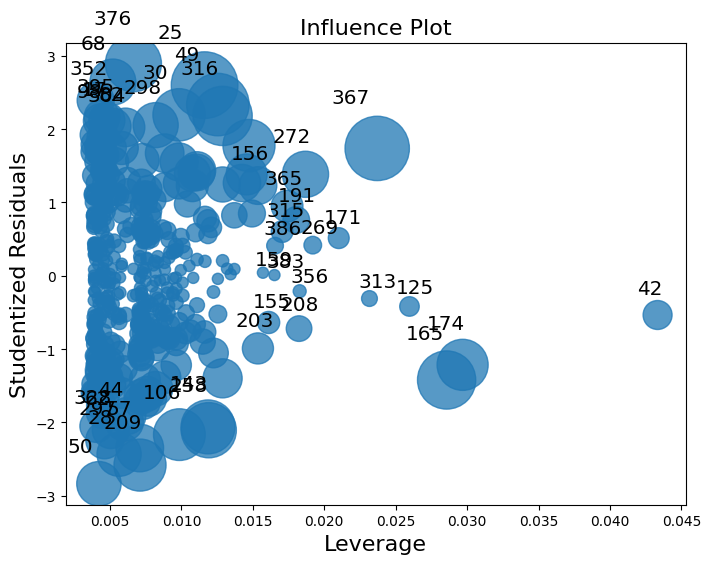

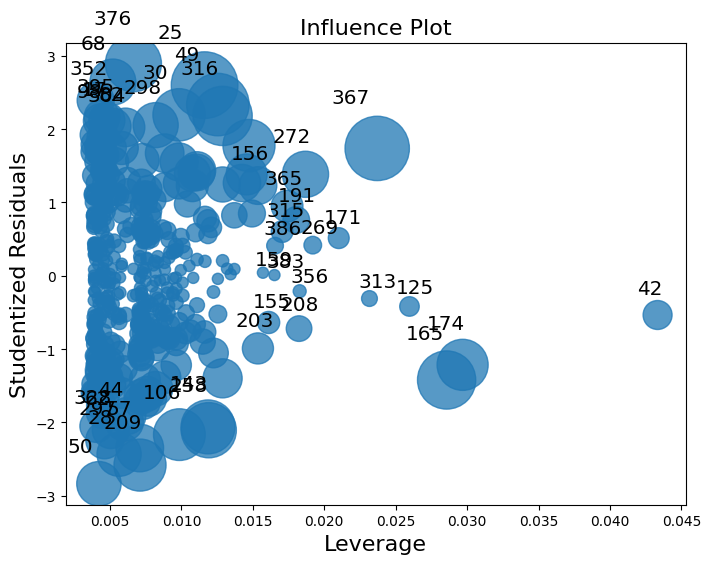

In [77]:
fig, ax = plt.subplots(figsize=(8, 6))
sm.graphics.influence_plot(carsets_model, ax=ax, criterion="cooks")

In [78]:
np.random.seed(1)
X = np.random.normal(0, 1, 100)
Y = 2 * X + np.random.normal(0, 0.5, 100)

In [79]:
model_y_on_x = sm.OLS(Y, X).fit()
beta_y_on_x = model_y_on_x.params[0]

In [80]:
model_x_on_y = sm.OLS(X, Y).fit()
beta_x_on_y = model_x_on_y.params[0]

In [82]:
print(f"B_Y~X = {beta_y_on_x:.4f}")
print(f"B_X~Y = {beta_x_on_y:.4f}")

B_Y~X = 2.0534
B_X~Y = 0.4566


In [83]:
np.random.seed(2)
X = np.random.normal(0, 1, 100)
X = X / np.linalg.norm(X)
Y = X.copy()

In [84]:
model_y_on_x = sm.OLS(Y, X).fit()
beta_y_on_x = model_y_on_x.params[0]

In [85]:
model_x_on_y = sm.OLS(X, Y).fit()
beta_x_on_y = model_x_on_y.params[0]

In [86]:
print(f"β̂_Y~X = {beta_y_on_x:.4f}")
print(f"β̂_X~Y = {beta_x_on_y:.4f}")

β̂_Y~X = 1.0000
β̂_X~Y = 1.0000
